<a href="https://colab.research.google.com/github/the14thletter/IIITD/blob/master/CV_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Images

**Importing different modules and functions for creating a sequential model**

In [0]:
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers import BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.utils import plot_model
from keras import backend as K
from sklearn.model_selection import train_test_split
K.set_image_dim_ordering('th')

Using TensorFlow backend.


**As I'm using Google Colabs for this problem , it requires some steps to be followed to load the dataset **

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**As the data store in the form of pickle file, requires loading of data into variable data**

In [0]:
with open('/content/drive/My Drive/train_image.pkl', 'rb') as f:
    data = pickle.load(f)
    data = np.array(data)
    data = data.reshape(-1, 28, 28)

**Also the label store in the form of pickle file, requires loading of data into variable label**

In [0]:
with open('/content/drive/My Drive/train_label.pkl', 'rb') as f:
    label = pickle.load(f)
    label = np.array(label)
    label = label.reshape(-1, 1)

**Spliting the dataset into train and test data for training and validation purposes**

In [0]:
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.20, random_state=42)

**Visualisation of dataset**

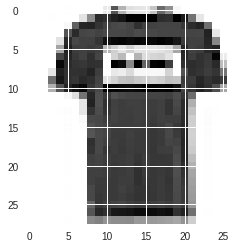

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(data[0], interpolation='nearest')
plt.show()

**Changing the shape of train and test dataset for fitting into the model**

In [0]:
data_train = data_train.reshape(data_train.shape[0], 1, 28, 28).astype('float32')
data_test = data_test.reshape(data_test.shape[0], 1, 28, 28).astype('float32')

In [12]:
label_train = np_utils.to_categorical(label_train)
label_test = np_utils.to_categorical(label_test)
num_classes = label_test.shape[1]
print(num_classes)

7


# CNN MODEL FOR TRAINING

**3 Conv2D layer, 2 Maxpooling layer, 3 Dense layer, Dropout is added to layer as to skip those neurons which in not participating in training, Activation function used ReLu, Optimizer Adam with learning rate of 0.001**

In [0]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=5,input_shape=(1, 28, 28), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size=3, activation = 'relu'))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation = "relu"))
    model.add(Dropout(0.4))
    model.add(Dense(7, activation = "softmax"))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

**Evaluation of Model**

In [16]:
model = cnn_model()
history = model.fit(data_train, label_train, validation_data=(data_test, label_test), \
                    epochs=20, batch_size=32, verbose=2)
scores = model.evaluate(data_test, label_test, verbose=0)
print('CNN Error {}'.format(100-scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 6400 samples, validate on 1600 samples
Epoch 1/20
 - 17s - loss: 1.0446 - acc: 0.5558 - val_loss: 0.6833 - val_acc: 0.6875
Epoch 2/20
 - 16s - loss: 0.7405 - acc: 0.6777 - val_loss: 0.6479 - val_acc: 0.7100
Epoch 3/20
 - 16s - loss: 0.6495 - acc: 0.7267 - val_loss: 0.5654 - val_acc: 0.7725
Epoch 4/20
 - 16s - loss: 0.5908 - acc: 0.7637 - val_loss: 0.4931 - val_acc: 0.7969
Epoch 5/20
 - 17s - loss: 0.5397 - acc: 0.7880 - val_loss: 0.5312 - val_acc: 0.7712
Epoch 6/20
 - 16s - loss: 0.4876 - acc: 0.8036 - val_loss: 0.4421 - val_acc: 0.8131
Epoch 7/20
 - 16s - loss: 0.4849 - acc: 0.8056 - val_loss: 0.4345 - val_acc: 0.8219
Epoch 8/20
Epoch 9/20
 - 16s - loss: 0.4354 - acc: 0.8267 - val_loss: 0.4036 - val_acc: 0.8375
Epoch 10/20
 - 16s - loss: 0.4132 

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 24, 24)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 12, 12)        48        
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 10, 10)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 5, 5)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 5, 5)          20        
__________

**Visualization **

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


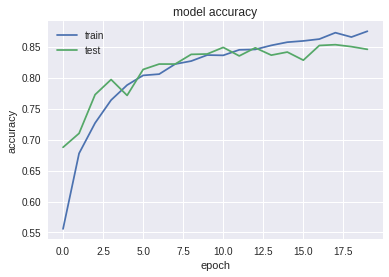

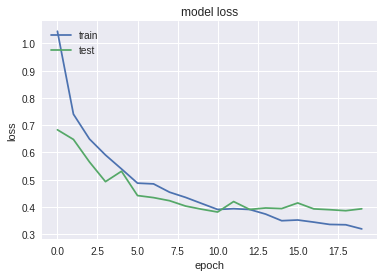

In [18]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Testing the Model

In [0]:
with open('/content/drive/My Drive/test_image.pkl', 'rb') as f:
    test_data = pickle.load(f)
    test_data = np.array(test_data)
    test_data = test_data.reshape(-1, 1, 28, 28)

**Saving the prediction into CSV file using pandas module**

In [0]:
import pandas as pd

predictions = model.predict(test_data)
predictions = np.argmax(predictions, axis=1)
predictions = pd.Series(predictions, name="predicted class")
submit = pd.concat([pd.Series(range(2000), name="Test_image_index"), predictions], axis=1)
submit.to_csv("Nishchal_Kumar.csv", index=False)

In [0]:
from google.colab import files
files.download('Nishchal_Kumar.csv') 